In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
INV_dataset = pd.read_csv('/content/drive/MyDrive/Solar Arise/INV.csv')
GII_dataset = pd.read_csv('/content/drive/MyDrive/Solar Arise/GII.csv')

In [ ]:
INV_dataset.head()


,Unnamed: 0,time_ist,meter_type,meter_id,meter_tag,reading_type,reading_value
0,1,2021-07-01 00:00:00,INV,7,BLOCK-1_INV-A,Export_Energy,15716.1
1,2,2021-07-01 00:05:00,INV,7,BLOCK-1_INV-A,Export_Energy,15716.1
2,3,2021-07-01 00:10:00,INV,7,BLOCK-1_INV-A,Export_Energy,15716.1
3,4,2021-07-01 00:15:00,INV,7,BLOCK-1_INV-A,Export_Energy,0.0
4,5,2021-07-01 00:20:00,INV,7,BLOCK-1_INV-A,Export_Energy,0.0


In [ ]:
len(INV_dataset)

103692

In [ ]:
INV_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103692 entries, 0 to 103691
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     103692 non-null  int64  
 1   time_ist       103692 non-null  object 
 2   meter_type     103692 non-null  object 
 3   meter_id       103692 non-null  int64  
 4   meter_tag      103692 non-null  object 
 5   reading_type   103692 non-null  object 
 6   reading_value  103680 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 5.5+ MB


In [ ]:
print (INV_dataset['meter_type'].unique())
print (INV_dataset['meter_id'].unique())
print (INV_dataset['meter_tag'].unique())
print (INV_dataset['reading_type'].unique())


['INV']
[ 7  8  9 10 11 12 13 14 15 16 17 18]
['BLOCK-1_INV-A' 'BLOCK-1_INV-B' 'BLOCK-2_INV-A' 'BLOCK-2_INV-B'
 'BLOCK-3_INV-A' 'BLOCK-3_INV-B' 'BLOCK-4_INV-A' 'BLOCK-4_INV-B'
 'BLOCK-5_INV-A' 'BLOCK-5_INV-B' 'BLOCK-6_INV-A' 'BLOCK-6_INV-B']
['Export_Energy']


In [ ]:
INV_dataset.drop(['Unnamed: 0','meter_type','reading_type','meter_id'], axis=1, inplace=True)


In [ ]:
len(GII_dataset)

8641

In [ ]:
GII_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8641 entries, 0 to 8640
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   8641 non-null   int64  
 1   DateAndTime  8641 non-null   object 
 2   Irradiance   8640 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 202.6+ KB


In [ ]:
GII_dataset

,Unnamed: 0,DateAndTime,Irradiance
0,1,01-07-2021 00:00,0.0
1,2,01-07-2021 00:05,0.0
2,3,01-07-2021 00:10,0.0
3,4,01-07-2021 00:15,0.0
4,5,01-07-2021 00:20,0.0
...,...,...,...
8636,8637,30-07-2021 23:40,0.0
8637,8638,30-07-2021 23:45,0.0
8638,8639,30-07-2021 23:50,0.0
8639,8640,30-07-2021 23:55,0.0


In [ ]:
# GII_dataset['DateAndTime'] = pd.to_datetime(GII_dataset['DateAndTime'])

In [ ]:
INV_dataset_pivot=INV_dataset.pivot(index=['time_ist'], columns='meter_tag',values=['reading_value'])

INV_dataset_pivot.columns = INV_dataset_pivot.columns.droplevel()
modified_INV_dataset=INV_dataset_pivot.rename_axis(None,axis=1)
modified_INV_dataset


,BLOCK-1_INV-A,BLOCK-1_INV-B,BLOCK-2_INV-A,BLOCK-2_INV-B,BLOCK-3_INV-A,BLOCK-3_INV-B,BLOCK-4_INV-A,BLOCK-4_INV-B,BLOCK-5_INV-A,BLOCK-5_INV-B,BLOCK-6_INV-A,BLOCK-6_INV-B
time_ist,,,,,,,,,,,,
2021-07-01 00:00:00,15716.100000,15895.000000,16555.000000,15934.700000,15952.400000,16289.800000,5744.300000,6928.900000,16510.000000,14138.600000,16086.100000,16545.9
2021-07-01 00:05:00,15716.100000,15895.000000,16555.000000,15934.700000,15952.400000,16289.800000,5744.300000,6928.900000,16510.000000,14138.600000,16086.100000,16545.9
2021-07-01 00:10:00,15716.100000,4054.100000,0.000000,0.000000,15952.400000,16289.800000,5744.300000,6928.900000,16510.000000,14138.600000,0.000000,0.0
2021-07-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5744.300000,0.000000,0.000000,0.000000,0.000000,0.0
2021-07-01 00:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-30 23:40:00,11515.800000,11327.300000,11459.700000,10882.900000,11474.900000,11393.700000,11474.700000,11548.100000,11374.900000,9625.100000,8716.300000,10008.0
2021-07-30 23:45:00,11515.800000,11327.300000,11459.700000,10882.900000,11474.900000,11393.700000,11474.700000,11548.100000,11374.900000,9625.100000,8716.300000,10008.0
2021-07-30 23:50:00,11515.800000,11327.300000,11459.700000,10882.900000,11474.900000,11393.700000,11474.700000,11548.100000,11374.900000,9625.100000,8716.300000,10008.0


In [ ]:
modified_INV_dataset = modified_INV_dataset.reset_index()
modified_INV_dataset['Unnamed: 0']=modified_INV_dataset.index+1


In [ ]:
merged_dataset=modified_INV_dataset.merge(GII_dataset, how='right')
merged_dataset

,time_ist,BLOCK-1_INV-A,BLOCK-1_INV-B,BLOCK-2_INV-A,BLOCK-2_INV-B,BLOCK-3_INV-A,BLOCK-3_INV-B,BLOCK-4_INV-A,BLOCK-4_INV-B,BLOCK-5_INV-A,BLOCK-5_INV-B,BLOCK-6_INV-A,BLOCK-6_INV-B,Unnamed: 0,DateAndTime,Irradiance
0,2021-07-01 00:00:00,15716.100000,15895.000000,16555.000000,15934.700000,15952.400000,16289.800000,5744.300000,6928.900000,16510.000000,14138.600000,16086.100000,16545.9,1,01-07-2021 00:00,0.0
1,2021-07-01 00:05:00,15716.100000,15895.000000,16555.000000,15934.700000,15952.400000,16289.800000,5744.300000,6928.900000,16510.000000,14138.600000,16086.100000,16545.9,2,01-07-2021 00:05,0.0
2,2021-07-01 00:10:00,15716.100000,4054.100000,0.000000,0.000000,15952.400000,16289.800000,5744.300000,6928.900000,16510.000000,14138.600000,0.000000,0.0,3,01-07-2021 00:10,0.0
3,2021-07-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5744.300000,0.000000,0.000000,0.000000,0.000000,0.0,4,01-07-2021 00:15,0.0
4,2021-07-01 00:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,5,01-07-2021 00:20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8636,2021-07-30 23:40:00,11515.800000,11327.300000,11459.700000,10882.900000,11474.900000,11393.700000,11474.700000,11548.100000,11374.900000,9625.100000,8716.300000,10008.0,8637,30-07-2021 23:40,0.0
8637,2021-07-30 23:45:00,11515.800000,11327.300000,11459.700000,10882.900000,11474.900000,11393.700000,11474.700000,11548.100000,11374.900000,9625.100000,8716.300000,10008.0,8638,30-07-2021 23:45,0.0
8638,2021-07-30 23:50:00,11515.800000,11327.300000,11459.700000,10882.900000,11474.900000,11393.700000,11474.700000,11548.100000,11374.900000,9625.100000,8716.300000,10008.0,8639,30-07-2021 23:50,0.0
8639,2021-07-30 23:55:00,11515.800000,11327.300000,11459.700000,10882.900000,11474.900000,11393.700000,11474.700000,11548.100000,11374.900000,9625.100000,8716.300000,10008.0,8640,30-07-2021 23:55,0.0


In [445]:
merged_dataset
df=merged_dataset




# **Exploring and Visualizing Data**


In [ ]:
df.describe()


,BLOCK-1_INV-A,BLOCK-1_INV-B,BLOCK-2_INV-A,BLOCK-2_INV-B,BLOCK-3_INV-A,BLOCK-3_INV-B,BLOCK-4_INV-A,BLOCK-4_INV-B,BLOCK-5_INV-A,BLOCK-5_INV-B,BLOCK-6_INV-A,BLOCK-6_INV-B,Irradiance
count,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000
mean,5313.551810,5257.987164,5524.303166,5237.481921,4983.589279,4982.269869,3936.607620,3989.773623,5449.733123,4636.728735,4967.224934,4928.172031,299.799406
std,4190.759257,4135.060751,4362.691335,4124.725068,3873.118710,3872.543759,2983.161245,3009.131581,4272.852884,3679.806068,4024.679345,3960.753376,252.234605
min,0.000000,0.000000,0.200000,0.100000,0.200000,0.200000,0.000000,0.100000,0.100000,0.100000,0.000000,0.000000,0.001000
25%,1329.925000,1299.699951,1343.750037,1286.625000,1344.875000,1347.549988,1354.750000,1373.424988,1353.225012,1137.875000,1278.600000,1298.800000,103.666750
50%,4807.550049,4763.050049,5072.200000,4840.200000,4644.849902,4640.850049,3653.000049,3708.649951,5114.050098,4219.949951,4509.700000,4541.149902,240.399500
75%,8645.100342,8574.000000,9008.650293,8528.349854,8023.499927,8003.525146,5915.324951,5988.624878,8806.449951,7492.675000,7882.399927,7924.299951,425.592500
max,15211.300000,15064.100000,15261.200195,14193.100000,15010.200195,15113.400391,13120.500000,13242.400000,15207.400391,12799.700000,15290.200195,14845.200000,1259.040000


In [ ]:
(df== 0).sum()



BLOCK-1_INV-A     1
BLOCK-1_INV-B     2
BLOCK-2_INV-A     0
BLOCK-2_INV-B     0
BLOCK-3_INV-A     0
BLOCK-3_INV-B     0
BLOCK-4_INV-A    45
BLOCK-4_INV-B     0
BLOCK-5_INV-A     0
BLOCK-5_INV-B     0
BLOCK-6_INV-A     2
BLOCK-6_INV-B     1
DateAndTime       0
Irradiance        0
dtype: int64

In [ ]:
df.columns


Index(['BLOCK-1_INV-A', 'BLOCK-1_INV-B', 'BLOCK-2_INV-A', 'BLOCK-2_INV-B',
       'BLOCK-3_INV-A', 'BLOCK-3_INV-B', 'BLOCK-4_INV-A', 'BLOCK-4_INV-B',
       'BLOCK-5_INV-A', 'BLOCK-5_INV-B', 'BLOCK-6_INV-A', 'BLOCK-6_INV-B',
       'DateAndTime', 'Irradiance'],
      dtype='object')

In [ ]:
for i in range(len(df)):
 if df.Irradiance[i]==0 : 
  df.drop([i], inplace= True)

In [ ]:
len(df)

4581

In [459]:
df['day'] = pd.to_datetime(df['time_ist']).apply(lambda x : x.day)
df['hour'] = pd.to_datetime(df['time_ist']).apply(lambda x : x.hour)

In [ ]:
INV_col=['BLOCK-1_INV-A','BLOCK-1_INV-B','BLOCK-2_INV-A','BLOCK-2_INV-B','BLOCK-3_INV-A','BLOCK-3_INV-B','BLOCK-4_INV-A','BLOCK-4_INV-B','BLOCK-5_INV-A','BLOCK-5_INV-B','BLOCK-6_INV-A','BLOCK-6_INV-B']
INV_col

# **Question 1**: Visualise the output of each inverter w.r.t GII.


In [446]:
df1 = df.set_index('time_ist')


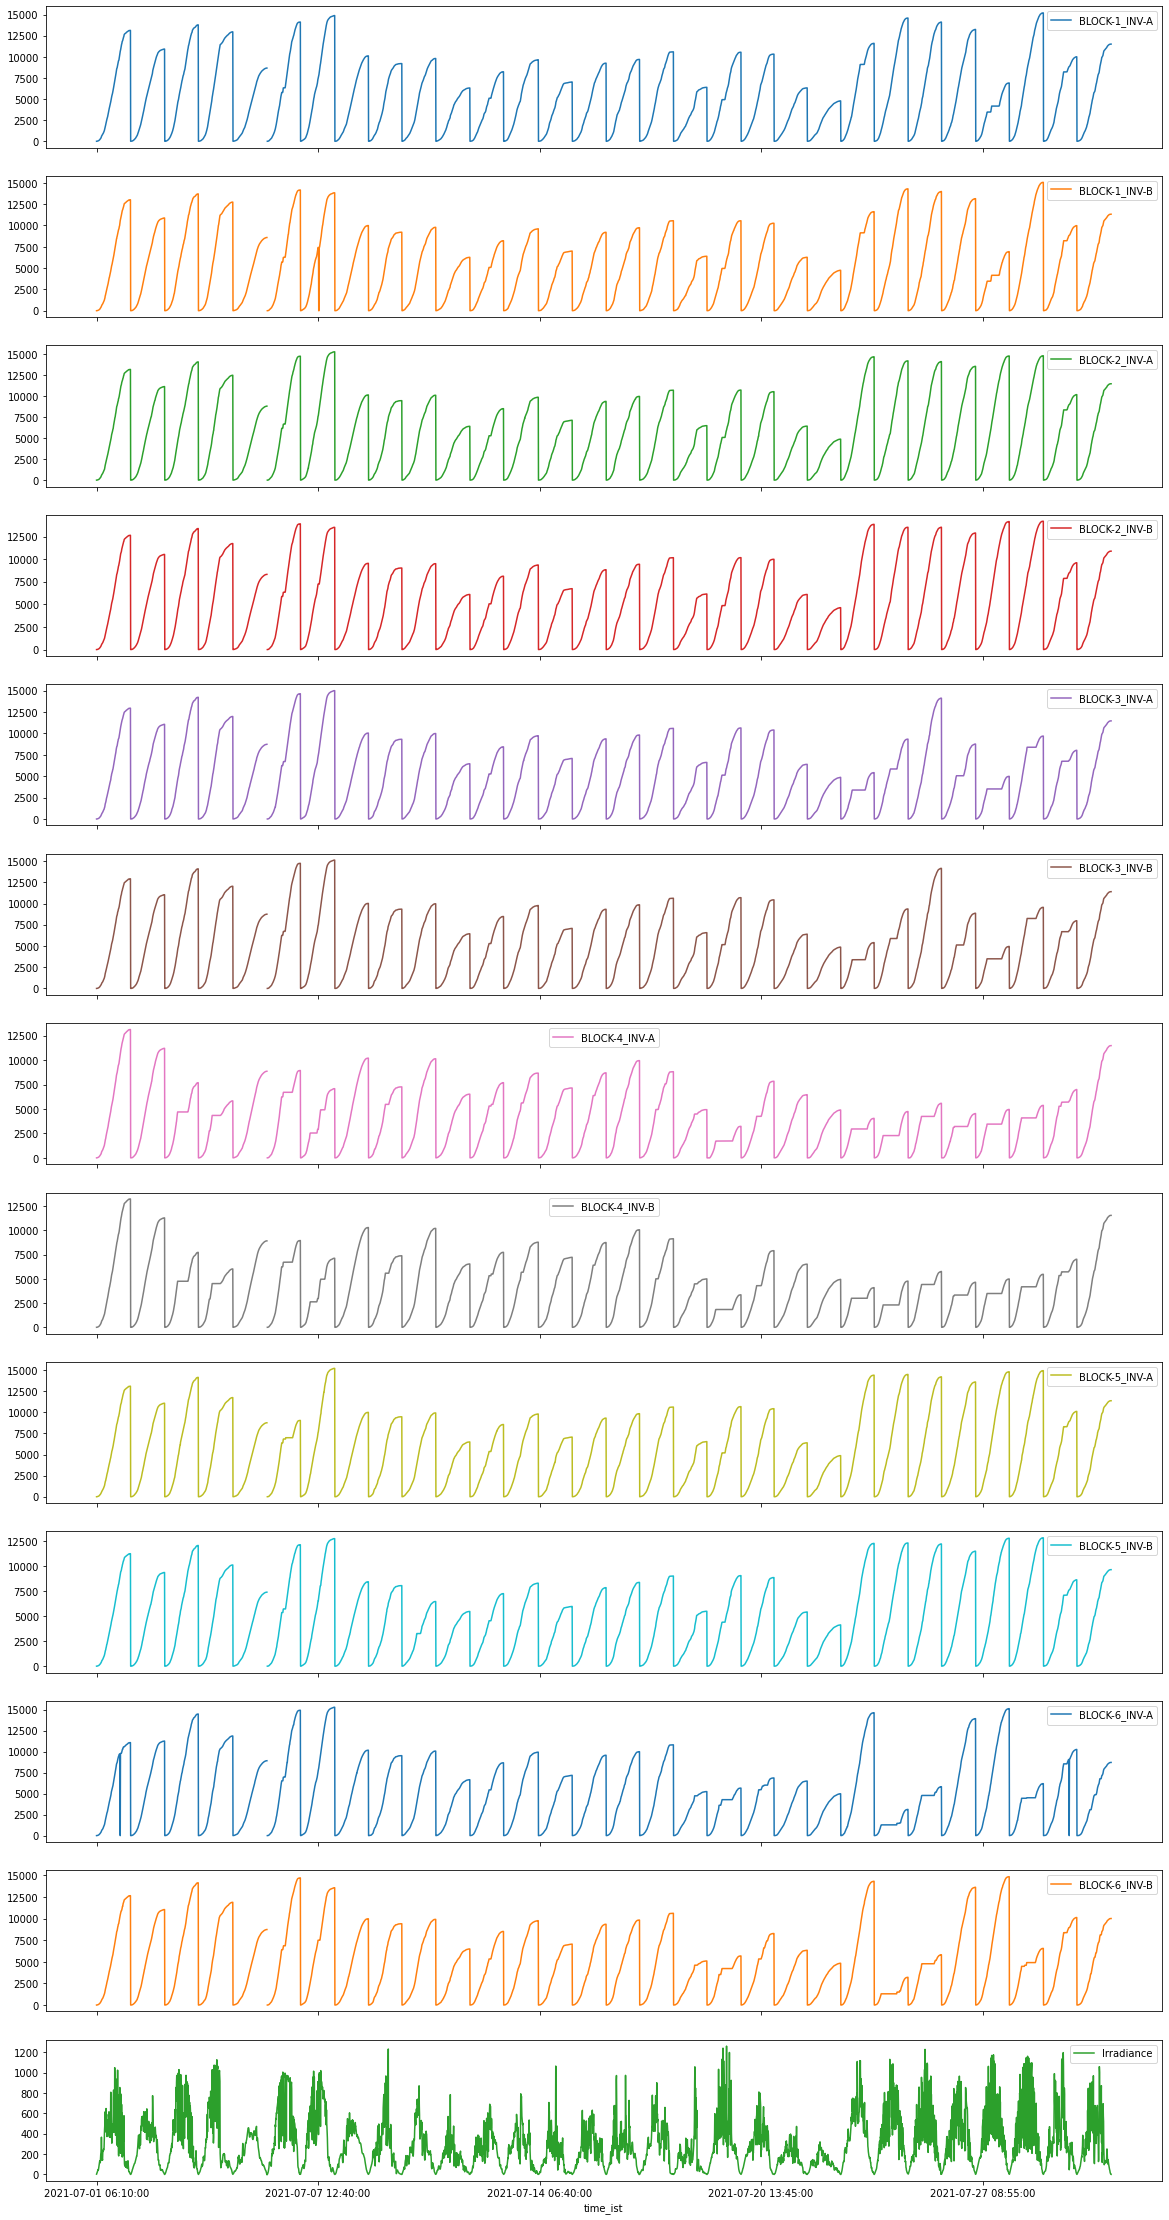

In [461]:
df.plot(subplots=True, figsize=(20, 40))
plt.show()



# **Question 2**: Calculate the total output of Inverter Output and GII of each day.

In [513]:
count_df=df.groupby(['day'])['BLOCK-1_INV-A','BLOCK-1_INV-B','BLOCK-2_INV-A','BLOCK-2_INV-B','BLOCK-3_INV-A','BLOCK-3_INV-B','BLOCK-4_INV-A','BLOCK-4_INV-B','BLOCK-5_INV-A','BLOCK-5_INV-B','BLOCK-6_INV-A','BLOCK-6_INV-B','Irradiance'].sum()
count_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,BLOCK-1_INV-A,BLOCK-1_INV-B,BLOCK-2_INV-A,BLOCK-2_INV-B,BLOCK-3_INV-A,BLOCK-3_INV-B,BLOCK-4_INV-A,BLOCK-4_INV-B,BLOCK-5_INV-A,BLOCK-5_INV-B,BLOCK-6_INV-A,BLOCK-6_INV-B,Irradiance
day,,,,,,,,,,,,,
1,1.009194e+06,1.001769e+06,1.017063e+06,9.713248e+05,9.963454e+05,9.933492e+05,1.010628e+06,1.022340e+06,1.005464e+06,8.610050e+05,9.118145e+05,9.830299e+05,53453.862000
2,8.615392e+05,8.574955e+05,8.765315e+05,8.295343e+05,8.719184e+05,8.703364e+05,8.822419e+05,8.904050e+05,8.729192e+05,7.357134e+05,8.872509e+05,8.707397e+05,44198.786000
3,1.033571e+06,1.027200e+06,1.053169e+06,9.987944e+05,1.064930e+06,1.053163e+06,6.131388e+05,6.195876e+05,1.054488e+06,8.981798e+05,1.083058e+06,1.058669e+06,59069.966799
4,1.099803e+06,1.077396e+06,1.057183e+06,9.970332e+05,1.017726e+06,1.025421e+06,5.359615e+05,5.559635e+05,1.001787e+06,8.591419e+05,1.013066e+06,1.014091e+06,55500.636000
5,6.401463e+05,6.337724e+05,6.505483e+05,6.161785e+05,6.468334e+05,6.480031e+05,6.550633e+05,6.599201e+05,6.503809e+05,5.476882e+05,6.623467e+05,6.482233e+05,33733.956000
6,1.013551e+06,1.009626e+06,1.056136e+06,1.000323e+06,1.056064e+06,1.060746e+06,7.462393e+05,7.483273e+05,7.638405e+05,8.765455e+05,1.084553e+06,1.066951e+06,71268.315000
7,1.166096e+06,1.076403e+06,1.197905e+06,1.065639e+06,1.171703e+06,1.181637e+06,5.566193e+05,5.645837e+05,1.192695e+06,1.000766e+06,1.203120e+06,1.077012e+06,66351.471000
8,7.472176e+05,7.381851e+05,7.497609e+05,7.075754e+05,7.462127e+05,7.439277e+05,7.563854e+05,7.632907e+05,7.444624e+05,6.265240e+05,7.584375e+05,7.431905e+05,40122.715000
9,7.559139e+05,7.540941e+05,7.712506e+05,7.377093e+05,7.684538e+05,7.684265e+05,6.278525e+05,6.362169e+05,7.782123e+05,6.574577e+05,7.806352e+05,7.735623e+05,37117.107000


In [514]:
count_df2=count_df.T


day
1     1.183678e+07
2     1.035082e+07
3     1.161702e+07
4     1.131008e+07
5     7.692838e+06
6     1.155417e+07
7     1.252053e+07
8     8.865293e+06
9     8.846902e+06
10    8.925348e+06
11    6.431678e+06
12    7.556625e+06
13    9.548415e+06
14    7.141871e+06
15    8.180518e+06
16    9.148056e+06
17    9.242320e+06
18    5.737034e+06
19    8.004357e+06
20    8.282540e+06
21    5.919811e+06
22    4.737293e+06
23    9.960425e+06
24    8.965070e+06
25    1.039907e+07
26    1.035931e+07
27    9.500160e+06
28    1.079667e+07
29    8.983521e+06
30    1.012856e+07
dtype: float64

In [531]:
count_df2=count_df2.sum()

In [532]:
final_count_df2=pd.DataFrame(count_df2)
final_count_df2['Irradiance']=count_df['Irradiance']
final_count_df2.rename(columns={0:'Inverter Output'}, inplace=True)
final_count_df2


,Inverter Output,Irradiance
day,,
1,1.183678e+07,53453.862000
2,1.035082e+07,44198.786000
3,1.161702e+07,59069.966799
4,1.131008e+07,55500.636000
5,7.692838e+06,33733.956000
6,1.155417e+07,71268.315000
7,1.252053e+07,66351.471000
8,8.865293e+06,40122.715000
9,8.846902e+06,37117.107000


# **Question 3**: Which Inverter is performing lower and if possible, provide any theoretical method on how to improve the performance of the unit.

In [533]:
count_df.sum()

BLOCK-1_INV-A    2.433607e+07
BLOCK-1_INV-B    2.408158e+07
BLOCK-2_INV-A    2.530131e+07
BLOCK-2_INV-B    2.398767e+07
BLOCK-3_INV-A    2.282484e+07
BLOCK-3_INV-B    2.281880e+07
BLOCK-4_INV-A    1.802966e+07
BLOCK-4_INV-B    1.827316e+07
BLOCK-5_INV-A    2.495978e+07
BLOCK-5_INV-B    2.123622e+07
BLOCK-6_INV-A    2.274989e+07
BLOCK-6_INV-B    2.257103e+07
Irradiance       1.373081e+06
dtype: float64

In [517]:
(df== 0).sum()


time_ist          0
BLOCK-1_INV-A     1
BLOCK-1_INV-B     2
BLOCK-2_INV-A     0
BLOCK-2_INV-B     0
BLOCK-3_INV-A     0
BLOCK-3_INV-B     0
BLOCK-4_INV-A    45
BLOCK-4_INV-B     0
BLOCK-5_INV-A     0
BLOCK-5_INV-B     0
BLOCK-6_INV-A     2
BLOCK-6_INV-B     1
DateAndTime       0
Irradiance        0
Date              0
day               0
hour              0
dtype: int64

both block of Inverter 4 is forming lower , compare to all other Inverter. We can see easily in above table that **BLOCK-4_INV-A** is highest no of producing 0 Unit.


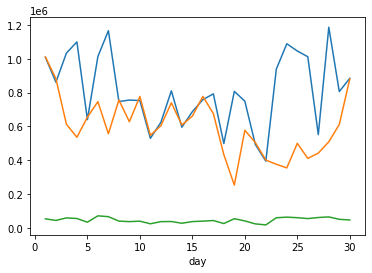

In [534]:
count_df['BLOCK-1_INV-A'].plot()
count_df['BLOCK-4_INV-A'].plot()
final_count_df2['Irradiance'].plot()


We can see Blue graph between 18 to 26 of the month very badly, so we need to inspect it and need to fix it.

## **Question 4**: Is there any relation between GII and Inverter Output?

In [538]:
# dataframe having fdata daywise between GII and Inverter output
final_count_df2

,Inverter Output,Irradiance
day,,
1,1.183678e+07,53453.862000
2,1.035082e+07,44198.786000
3,1.161702e+07,59069.966799
4,1.131008e+07,55500.636000
5,7.692838e+06,33733.956000
6,1.155417e+07,71268.315000
7,1.252053e+07,66351.471000
8,8.865293e+06,40122.715000
9,8.846902e+06,37117.107000


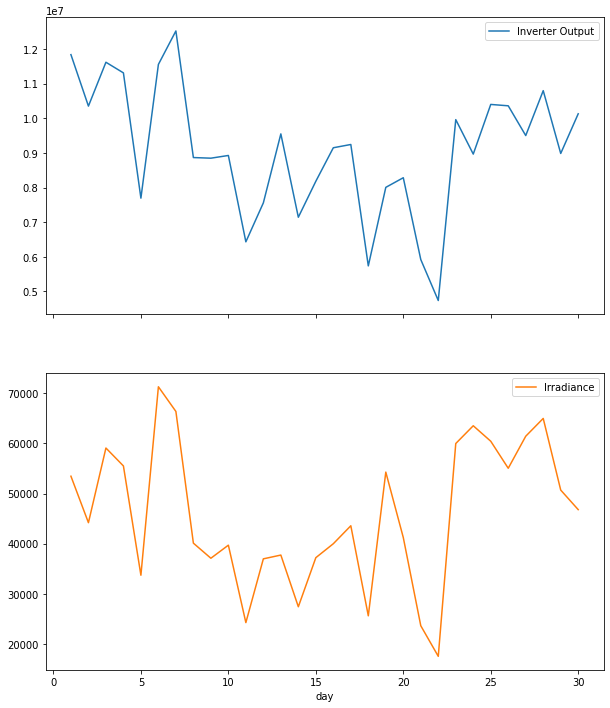

In [546]:
final_count_df2.plot(subplots=True, figsize=(10, 12))
plt.show()


We can see, **Inverter output** is proportional to **Irradiance** approximately most of the time.

# Any other insight that you can find from the data?

Now trying to analysis hour wise.

In [549]:
count_df_by_hour=df.groupby(['hour'])['BLOCK-1_INV-A','BLOCK-1_INV-B','BLOCK-2_INV-A','BLOCK-2_INV-B','BLOCK-3_INV-A','BLOCK-3_INV-B','BLOCK-4_INV-A','BLOCK-4_INV-B','BLOCK-5_INV-A','BLOCK-5_INV-B','BLOCK-6_INV-A','BLOCK-6_INV-B','Irradiance'].sum()
count_df_by_hour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,BLOCK-1_INV-A,BLOCK-1_INV-B,BLOCK-2_INV-A,BLOCK-2_INV-B,BLOCK-3_INV-A,BLOCK-3_INV-B,BLOCK-4_INV-A,BLOCK-4_INV-B,BLOCK-5_INV-A,BLOCK-5_INV-B,BLOCK-6_INV-A,BLOCK-6_INV-B,Irradiance
hour,,,,,,,,,,,,,
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
6,5.624700e+03,5.483000e+03,5.562800e+03,5.336800e+03,5.534300e+03,5.634600e+03,4.770700e+03,5.599200e+03,5.530400e+03,4.644500e+03,5.451600e+03,5.534900e+03,6785.885418
7,6.862490e+04,6.737210e+04,6.878760e+04,6.558450e+04,6.850640e+04,6.895270e+04,6.645450e+04,7.023330e+04,6.865780e+04,5.780050e+04,6.783170e+04,6.856380e+04,37758.566628
8,2.470311e+05,2.436906e+05,2.492525e+05,2.382083e+05,2.501721e+05,2.507156e+05,2.499107e+05,2.555035e+05,2.509391e+05,2.112880e+05,2.537533e+05,2.506866e+05,78043.338465
9,5.472735e+05,5.412601e+05,5.560804e+05,5.301153e+05,5.556062e+05,5.572718e+05,5.522126e+05,5.619832e+05,5.584365e+05,4.706191e+05,5.571182e+05,5.478460e+05,119540.933945
10,9.558805e+05,9.476828e+05,9.685264e+05,9.202468e+05,9.632656e+05,9.641971e+05,9.072472e+05,9.231618e+05,9.696339e+05,8.171425e+05,9.580741e+05,9.414798e+05,155779.030518
11,1.418522e+06,1.406508e+06,1.451754e+06,1.379847e+06,1.410219e+06,1.409440e+06,1.246393e+06,1.265984e+06,1.452210e+06,1.224814e+06,1.398867e+06,1.380102e+06,167009.420263
12,1.892971e+06,1.870048e+06,1.948345e+06,1.852811e+06,1.836628e+06,1.836864e+06,1.529019e+06,1.550290e+06,1.950843e+06,1.639170e+06,1.835718e+06,1.814481e+06,190307.244842
13,2.378658e+06,2.344672e+06,2.463733e+06,2.333661e+06,2.238614e+06,2.238786e+06,1.759205e+06,1.782450e+06,2.448756e+06,2.062944e+06,2.259223e+06,2.223911e+06,184502.360978


We can see in the table there are outout between  6 AM to 7 PM 

In [551]:
count_df_by_hour2=count_df_by_hour.T


In [552]:
count_df_by_hour2=count_df_by_hour2.sum()

In [554]:
final_count_df_by_hour2=pd.DataFrame(count_df_by_hour2)
final_count_df_by_hour2['Irradiance']=count_df_by_hour['Irradiance']
final_count_df_by_hour2.rename(columns={0:'Inverter Output'}, inplace=True)
final_count_df_by_hour2

,Inverter Output,Irradiance
hour,,
3,0.000000e+00,0.000000
6,7.149339e+04,6785.885418
7,8.451284e+05,37758.566628
8,3.029195e+06,78043.338465
9,6.655364e+06,119540.933945
10,1.139232e+07,155779.030518
11,1.661167e+07,167009.420263
12,2.174749e+07,190307.244842
13,2.671912e+07,184502.360978


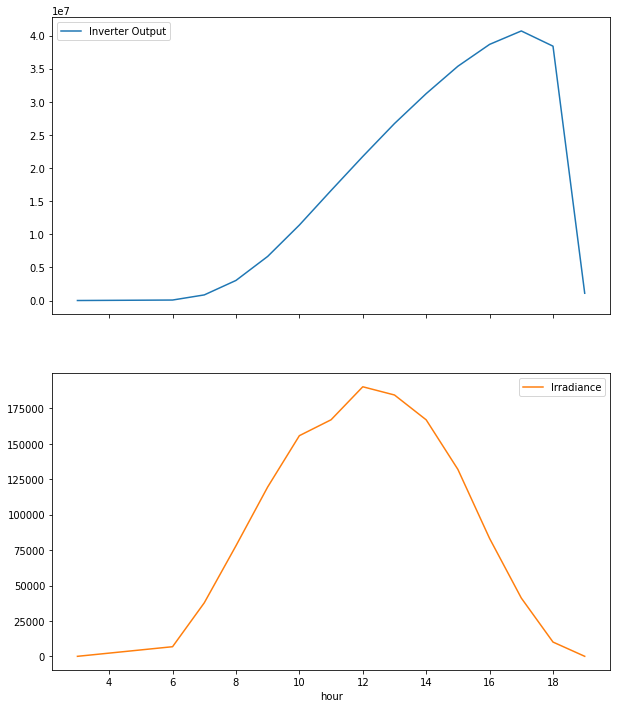

In [555]:
final_count_df_by_hour2.plot(subplots=True, figsize=(10, 12))
plt.show()

We can see Irradiance is 0 till 6 AM and highest at 12 after that decresing till 7 PM. While **Inverter Output** is highest at **5 PM** 